In [1]:
using Pkg, Revise
Pkg.activate(joinpath(@__DIR__, "../.."))
using EasyABM

  Activating project at `~/Documents/EasyABM`
[ Info: Precompiling EasyABM [2ab8e4d3-e1e9-4248-86a3-8419d2d242e9]


WebIO._IJuliaInit()

In [2]:
gr = square_grid_graph(10,10,periodic=false);
gr.edgesprops[(1,2)].color = cl"red"
gr.nodesprops[1].size = 0.1

0.1

In [3]:
typeof(gr)

EasyABM.SimplePropGraph{EasyABM.StaticType, EasyABM.SimGType}

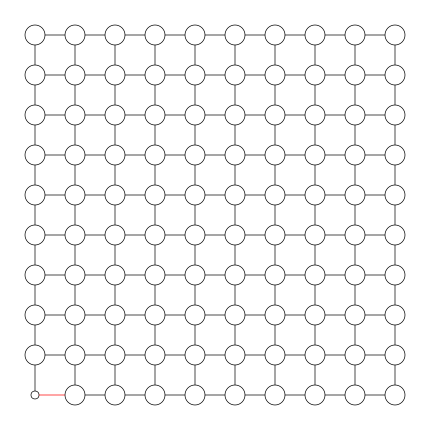

In [4]:
draw_graph(gr)

In [5]:
length(vertices(gr))

100

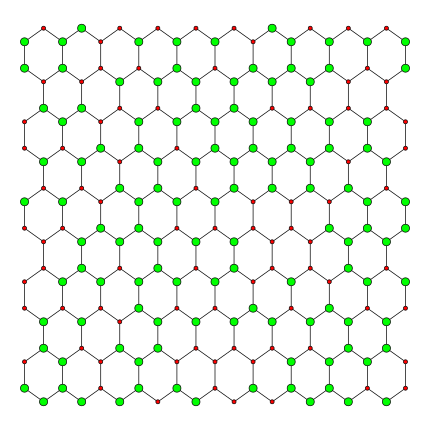

In [9]:
n = 10
gr = hex_grid_graph(n,n);
m = length(vertices(gr))
for i in 1:m
    if rand()< 0.4
        gr.nodesprops[i].size = 0.05
        gr.nodesprops[i].color=cl"red"
    else
        gr.nodesprops[i].size = 0.1
        gr.nodesprops[i].color=cl"green"
    end
end
draw_graph(gr)

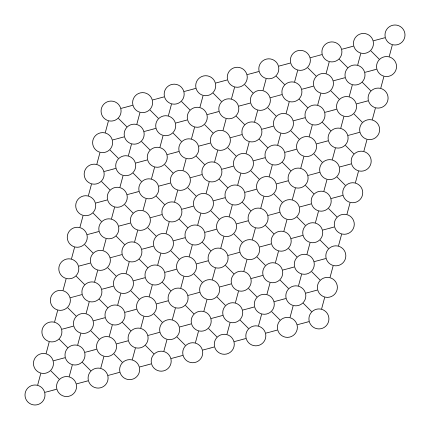

In [10]:
gr = triangular_grid_graph(10,10);
draw_graph(gr)

In [14]:
set_screen!(400,400)

400

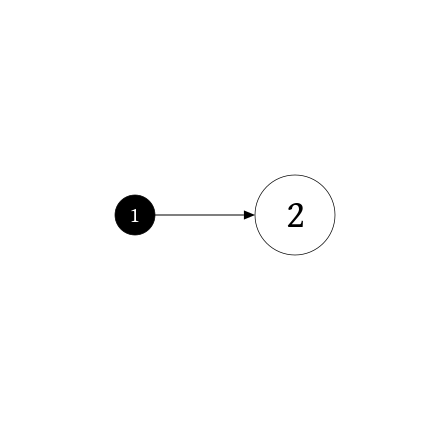

In [25]:
gr = graph_from_dict(Dict(
        "num_nodes"=>2,
        "edges"=>[(1,2)],
        "sizes" => [0.5,1.0],
        "colors" => [cl"black"],
        "is_directed" => true,
        "is_dynamic" => true
        ))
draw_graph(gr, mark_nodes=true)

In [31]:
agents = graph_agents(2, node=2, keeps_record_of=Set([:node, :color]))

GraphAgent list with 2 agents.


In [32]:
model = create_graph_model(agents, gr, agents_type=Mortal, vis_space="3d")

EasyABM GraphModel{EasyABM.MortalType, EasyABM.MortalType, EasyABM.DirGType}: In a {EasyABM.MortalType, EasyABM.MortalType} model graph topology can change and agents can take birth or die.


In [33]:
function initialiser!(model)
    model.graph.nodesprops[1].pos = (1.0,1.0,1.0)
    model.graph.nodesprops[1].color = cl"red"
    model.agents[1].node=1
    model.graph.nodesprops[2].pos = (5.0,5.0,5.0)
    model.graph.nodesprops[2].color = cl"blue"
end

initialiser! (generic function with 1 method)

In [34]:
init_model!(model, initialiser=initialiser!, props_to_record = Dict("nodes"=>Set([:color, :pos]))) 

In [35]:
function step_rule!(model)

    model.graph.nodesprops[1].pos = model.graph.nodesprops[1].pos .+ (1.0,1.0,1.0)
    if model.tick%2==0
        model.agents[2].node=2
        model.agents[2].color=cl"yellow"
    else
        model.agents[2].node=1
        model.agents[2].color=cl"black"
    end
         
end

step_rule! (generic function with 1 method)

In [36]:
run_model!(model, steps = 10, step_rule = step_rule!)

In [40]:
draw_frame(model, frame=3)

[ Info: Listening on: 127.0.0.1:8718, thread id: 1
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
└ http://127.0.0.1:8718


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0xa8, 0x2f, 0x6d, 0x65, 0x73, 0x68, 0x63, 0x61, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("nodes" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("1" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x61, 0x74, 0x2f, 0x6e, 0x6f, 0x64, 0x65, 0x73, 0x2f, 0x31], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x61, 0x74, 0x2f, 0x6e, 0x6f, 0x64, 0x65, 0x73, 0x2f, 0x31], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x61, 0x74, 0x2f, 0x6e, 0x6f, 0x64, 0x65, 0x73, 0x2f, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x61, 0x74, 0x2f, 0x6e, 0x6f, 0x64, 0x65, 0x73, 0x2f, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "agents" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("1" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x74, 0x2f, 0x61, 0x67, 0x65, 0x6e, 0x74, 0x73, 0x2f, 0x31], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x74, 0x2f, 0x61, 0x67, 0x65, 0x6e, 0x74, 0x73, 0x2f, 0x31], Dict{String, Vector{UInt8}}("position" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x74, 0x2f, 0x61, 0x67, 0x65, 0x6e, 0x74, 0x73, 0x2f, 0x31]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x74, 0x2f, 0x61, 0x67, 0x65, 0x6e, 0x74, 0x73, 0x2f, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x74, 0x2f, 0x61, 0x67, 0x65, 0x6e, 0x74, 0x73, 0x2f, 0x32], Dict{String, Vector{UInt8}}("position" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x74, 0x2f, 0x61, 0x67, 0x65, 0x6e, 0x74, 0x73, 0x2f, 0x32]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "bbox_line_segments" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("4" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x73, 0x65, 0x67, 0x6d, 0x65, 0x6e, 0x74, 0x73, 0x2f, 0x34], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "1" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x73, 0x65, 0x67, 0x6d, 0x65, 0x6e, 0x74, 0x73, 0x2f, 0x31], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "12" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x65, 0x67, 0x6d, 0x65, 0x6e, 0x74, 0x73, 0x2f, 0x31, 0x32], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x73, 0x65, 0x67, 0x6d, 0x65, 0x6e, 0x74, 0x73, 0x2f, 0x32], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "6" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x73, 0x65, 0x67, 0x6d, 0x65, 0x6e, 0x74, 0x73, 0x2f, 0x36], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()

In [43]:
animate_sim(model)

[ Info: Listening on: 127.0.0.1:8721, thread id: 1
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
└ http://127.0.0.1:8721


WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["time"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 11, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(6), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/home/dushya/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/home/dushya/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/home/dushya/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), WebIO.Asset("css", nothing, "/home/dushya/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), WebIO.Asset("css", nothing, "/home/dushya/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x00007f03e7e98970, Task (runnable) @0x00007f03e7e98970), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 0, 139779710648320)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n

In [13]:
dc = Dict((2,1)=>1, (1,2)=>2,(3,2)=>3)

Dict{Tuple{Int64, Int64}, Int64} with 3 entries:
  (3, 2) => 3
  (1, 2) => 2
  (2, 1) => 1

In [14]:
for key in keys(dc)
    println("$key")
end

(3, 2)
(1, 2)
(2, 1)


In [15]:
haskey(model.graph.edgesprops[(1,2)], :color)

false

In [16]:
EasyABM.unwrap_data(model.graph.edgesprops[(1,2)])

Dict{Symbol, Any}()

In [17]:
model.graph.edgesprops[(1,2)]._extras._b=2

2